In [1]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [5]:
data

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/13/22,8/14/22,8/15/22,8/16/22,8/17/22,8/18/22,8/19/22,8/20/22,8/21/22,8/22/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,188820,189045,189343,189477,189710,190010,190254,190435,190643,191040
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,321345,321804,322125,322837,323282,323829,325241,325736,326077,326181
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,269008,269141,269269,269381,269473,269556,269650,269731,269805,269894
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,45899,45899,45899,45899,45975,45975,45975,45975,45975,45975
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,102636,102636,102636,102636,102636,102636,102636,102636,102636,102636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,697447,697447,697447,697447,697447,697447,697447,697447,697447,698384
281,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
282,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11903,11903,11903,11903,11903,11914,11915,11915,11915,11915
283,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,331925,331925,332014,332014,332264,332264,332264,332264,332264,332527


In [54]:
confirmed_by_country = data.groupby("Country/Region").sum()

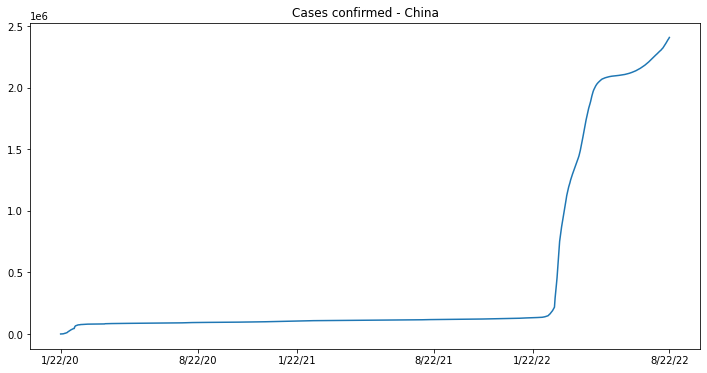

In [65]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 6))

ax.plot(confirmed_by_country.loc['China'][2:]);

ax.set_title('Cases confirmed - China')

ax.set_xticks(['1/22/20', '8/22/20', '1/22/21','8/22/21','1/22/22', '8/22/22']);